In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Files Copying from Zip to folder

In [ ]:
!unzip /content/drive/MyDrive/plant.zip -d /content/drive/MyDrive/Extracted

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: /content/drive/MyDrive/Extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: /content/drive/MyDrive/Extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: /content/drive/MyDrive/Extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: /content/drive/MyDrive/Extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_m

#### Split Folders


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Extracted/plantvillagedataset/color', output="output", seed=1337, ratio=(.8, .2), group_prefix=None)


Copying files: 54305 files [16:18, 55.50 files/s] 


#### MAIN

In [ ]:
import numpy as np
from re import sub
import tensorflow as tf
from tensorflow.keras import metrics

import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.CategoricalAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc')
]

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

**bold text**#### Using InceptionV3 CNN 

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


In [ ]:
classes = train_generator.class_indices
class_list = list(classes.keys())

In [ ]:
base_model=tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
model_history=model.fit(train_generator,validation_data =val_generator,steps_per_epoch=step_size_train,epochs=10)


Epoch 1/10
1357/1357 [==============================] - 339s 236ms/step - loss: 0.8218 - tp: 29954.0000 - fp: 4303.0000 - tn: 1601386.0000 - fn: 13443.0000 - accuracy: 0.7616 - precision: 0.8744 - recall: 0.6902 - auc: 0.9834 - val_loss: 1.2570 - val_tp: 6860.0000 - val_fp: 1903.0000 - val_tn: 400509.0000 - val_fn: 4016.0000 - val_accuracy: 0.6838 - val_precision: 0.7828 - val_recall: 0.6307 - val_auc: 0.9575
Epoch 2/10
1357/1357 [==============================] - 314s 231ms/step - loss: 0.2945 - tp: 38845.0000 - fp: 2744.0000 - tn: 1602945.0000 - fn: 4552.0000 - accuracy: 0.9141 - precision: 0.9340 - recall: 0.8951 - auc: 0.9953 - val_loss: 0.5181 - val_tp: 9276.0000 - val_fp: 1086.0000 - val_tn: 401326.0000 - val_fn: 1600.0000 - val_accuracy: 0.8707 - val_precision: 0.8952 - val_recall: 0.8529 - val_auc: 0.9846
Epoch 3/10
1357/1357 [==============================] - 313s 230ms/step - loss: 0.2087 - tp: 40322.0000 - fp: 2000.0000 - tn: 1603689.0000 - fn: 3075.0000 - accuracy: 0.9407 -

In [ ]:
#model=model_history
def download_and_predict(filename):
    # download and save
    #os.system("curl -s {} -o {}".format(url, filename))
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((224, 224))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = image.imread(filename)
    img = preprocess_input(img)
    probs = model.predict(img)
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", label_maps_rev[idx].split("-")[-1])

In [ ]:
def download_and_predict(url, filename):
    # download and save
    os.system("curl -s {} -o {}".format(url, filename))
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((299, 299))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = image.imread(filename)
    img = preprocess_input(img)
    probs = model.predict(np.expand_dims(img, axis=0))
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", label_maps_rev[idx].split("-")[-1])

In [ ]:
import os
import pandas as pd

import xml.etree.ElementTree as ET
#import gdown
import time
import math
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras.utils import np_utils
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
from sklearn.metrics import classification_report
import sklearn.metrics

from PIL import Image
import matplotlib.image as mpimg
#from imgaug import augmenters as iaa

AttributeError: ignored

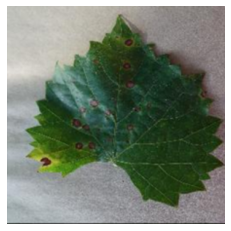

In [ ]:
download_and_predict("/content/test1.png","test1.png")

In [ ]:
test,test_acc = model.evaluate_generator(generator = val_generator,steps=int(20))

AttributeError: ignored

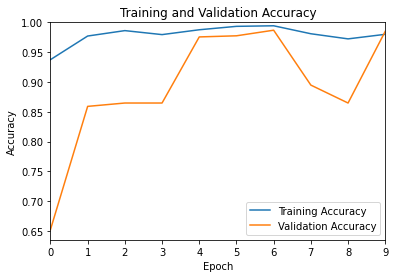

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Accuracy.png")

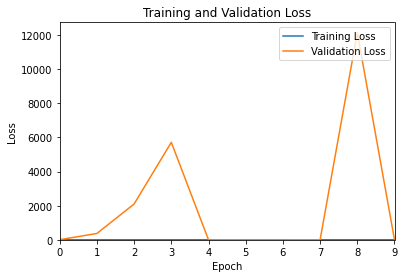

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([0,9])
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Loss.png")

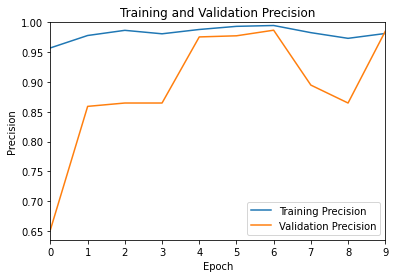

<Figure size 432x288 with 0 Axes>

In [ ]:
pre = model_history.history['precision']
val_pre = model_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Precision.png")

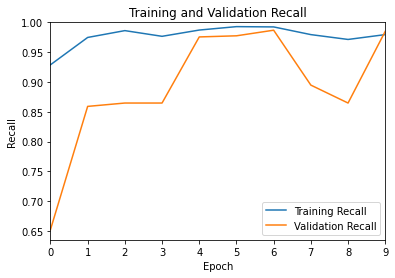

<Figure size 432x288 with 0 Axes>

In [ ]:
rec = model_history.history['recall']
val_rec = model_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Recall.png")

# **InceptionResnetV2**



In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


In [ ]:
base_model=tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

In [ ]:
model1=Model(inputs=base_model.input,outputs=preds)


In [ ]:
for layer in model1.layers[:20]:
    layer.trainable=False
for layer in model1.layers[20:]:
    layer.trainable=True

In [ ]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)


In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
model1_history=model1.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)


Epoch 1/10
1357/1357 [==============================] - 792s 583ms/step - loss: 0.3710 - tp: 37381.0000 - fp: 3079.0000 - tn: 1602610.0000 - fn: 6016.0000 - accuracy: 0.8896 - precision: 0.9239 - recall: 0.8614 - auc: 0.9943 - val_loss: 0.3613 - val_tp: 9837.0000 - val_fp: 808.0000 - val_tn: 401604.0000 - val_fn: 1039.0000 - val_accuracy: 0.9146 - val_precision: 0.9241 - val_recall: 0.9045 - val_auc: 0.9901
Epoch 2/10
1357/1357 [==============================] - 782s 577ms/step - loss: 0.1569 - tp: 41086.0000 - fp: 1562.0000 - tn: 1604127.0000 - fn: 2311.0000 - accuracy: 0.9550 - precision: 0.9634 - recall: 0.9467 - auc: 0.9975 - val_loss: 0.2572 - val_tp: 10172.0000 - val_fp: 564.0000 - val_tn: 401848.0000 - val_fn: 704.0000 - val_accuracy: 0.9410 - val_precision: 0.9475 - val_recall: 0.9353 - val_auc: 0.9924
Epoch 3/10
1357/1357 [==============================] - 781s 576ms/step - loss: 0.1165 - tp: 41773.0000 - fp: 1124.0000 - tn: 1604565.0000 - fn: 1624.0000 - accuracy: 0.9683 - pr

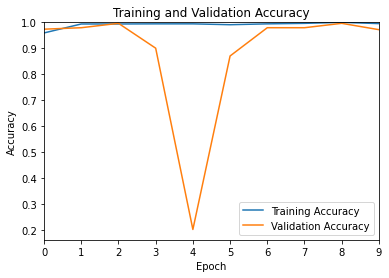

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = model1_history.history['accuracy']
val_acc = model1_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Accuracy.png")

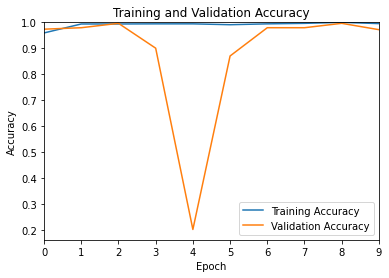

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = model1_history.history['accuracy']
val_acc = model1_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Accuracy.png")

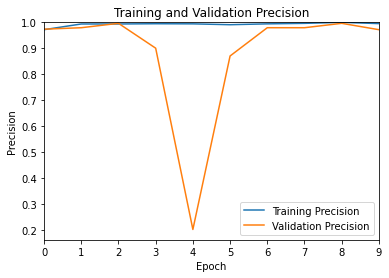

<Figure size 432x288 with 0 Axes>

In [ ]:
pre = model1_history.history['precision']
val_pre = model1_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Precision.png")


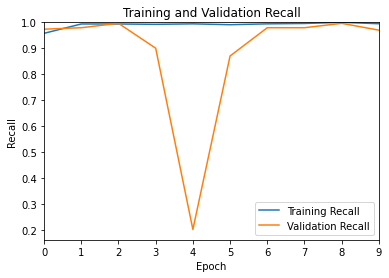

<Figure size 432x288 with 0 Axes>

In [ ]:
rec = model1_history.history['recall']
val_rec = model1_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Recall.png")

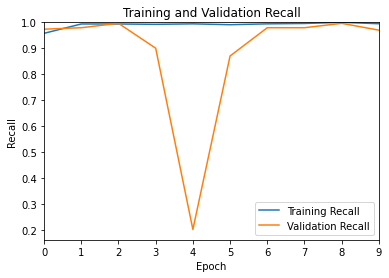

<Figure size 432x288 with 0 Axes>

In [ ]:
rec = model1_history.history['recall']
val_rec = model1_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Recall.png")

In [ ]:
model1.save("InceptionResNetV211.h5")

# MobileNet

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


In [ ]:
base_model=tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

In [ ]:
model2=Model(inputs=base_model.input,outputs=preds)


In [ ]:
for layer in model2.layers[:20]:
    layer.trainable=False
for layer in model2.layers[20:]:
    layer.trainable=True


In [ ]:
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)


In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
model2.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
1357/1357 [==============================] - 174s 125ms/step - loss: 0.4139 - tp: 47380.0000 - fp: 3598.0000 - tn: 2004503.0000 - fn: 6893.0000 - accuracy: 0.8967 - precision: 0.9294 - recall: 0.8730 - auc: 0.9932 - val_loss: 0.2919 - val_tp: 9850.0000 - val_fp: 660.0000 - val_tn: 401752.0000 - val_fn: 1026.0000 - val_accuracy: 0.9191 - val_precision: 0.9372 - val_recall: 0.9057 - val_auc: 0.9941
Epoch 2/10
1357/1357 [==============================] - 164s 121ms/step - loss: 0.2001 - tp: 40514.0000 - fp: 1794.0000 - tn: 1603895.0000 - fn: 2883.0000 - accuracy: 0.9458 - precision: 0.9576 - recall: 0.9336 - auc: 0.9963 - val_loss: 0.2895 - val_tp: 10032.0000 - val_fp: 593.0000 - val_tn: 401819.0000 - val_fn: 844.0000 - val_accuracy: 0.9318 - val_precision: 0.9442 - val_recall: 0.9224 - val_auc: 0.9926
Epoch 3/10
1357/1357 [==============================] - 162s 120ms/step - loss: 0.1595 - tp: 41194.0000 - fp: 1378.0000 - tn: 1604311.0000 - fn: 2203.0000 - accuracy: 0.9586 - pr

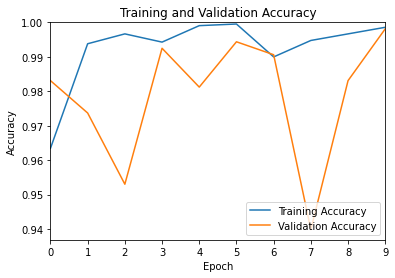

In [ ]:
acc = model2_history.history['accuracy']
val_acc = model2_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

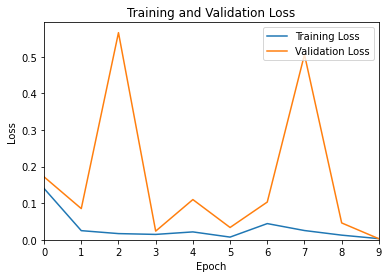

In [ ]:
loss = model2_history.history['loss']
val_loss = model2_history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([0,9])
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

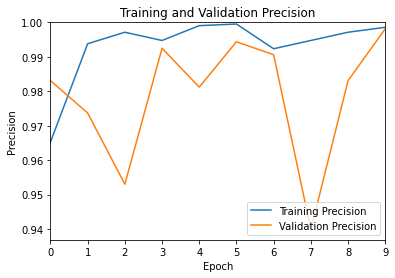

In [ ]:
pre = model2_history.history['precision']
val_pre = model2_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()

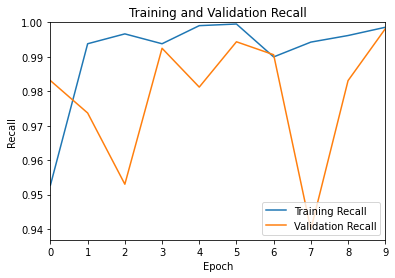

In [ ]:
rec = model2_history.history['recall']
val_rec = model2_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()

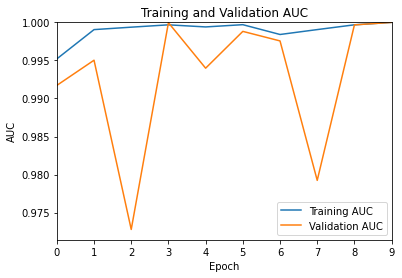

In [ ]:
auc = model2_history.history['auc']
val_auc = model2_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()